# Tree Models for Project 3

## Setup

### Import Libraries

In [1]:
import pandas as pd
import os

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

from operator import itemgetter

### Set File Locations

In [2]:
# note that some of the raw data files are very large
# these very large files are located in a gitignored directory.

# cleaned, merged data
merged_data_csv = "../00_Data/cleaned_data/cleaned_merged_data.csv"

# data with site predictions
export_data_csv = "../00_Data/cleaned_data/data_with_site_predictions.csv"

## Import Data

In [3]:
# Import census data
data_df = pd.read_csv(merged_data_csv)

data_df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220423 entries, 0 to 220422
Data columns (total 240 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fips_block_group                  220423 non-null  int64  
 1   state                             220423 non-null  float64
 2   state_name                        220423 non-null  object 
 3   county                            220423 non-null  float64
 4   county_name                       220423 non-null  object 
 5   tract                             220423 non-null  float64
 6   block_group                       220423 non-null  float64
 7   flag                              220423 non-null  float64
 8   land_area                         220423 non-null  float64
 9   aian_land                         220423 non-null  float64
 10  urbanized_area_pop_cen_2010       220423 non-null  float64
 11  urban_cluster_pop_cen_2010        220423 non-null  

## Prep Data

In [4]:
# Prepare the target
target = data_df["has_superfund"]
target_names = ["negative", "positive"]

In [5]:
# Prepare the features
# Drop all the columns that came in from the site data. This prevents 'trailing indicators' from getting into the model.
# Also drop any column that shouldn't mathematically matter, such as FIPS, tract, etc.
exclusion_list = ['fips_block_group',
            'state',
            'state_name',
            'county',
            'county_name',
            'tract',
            'block_group',
            'has_superfund',
            'fips_full',
            'address',
            'city',
            'date_added',
            'federal_facility_ind',
            'federal_register_url',
            'geocode_source',
            'latitude',
            'longitude',
            'site_epa_id',
            'site_name',
            'site_narrative_url',
            'site_progress_url',
            'site_score',
            'site_text'
            ]

feature_df = data_df.copy()
feature_df.drop(feature_df[exclusion_list],axis=1,inplace=True)
feature_names = feature_df.columns

feature_df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220423 entries, 0 to 220422
Data columns (total 217 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   flag                              220423 non-null  float64
 1   land_area                         220423 non-null  float64
 2   aian_land                         220423 non-null  float64
 3   urbanized_area_pop_cen_2010       220423 non-null  float64
 4   urban_cluster_pop_cen_2010        220423 non-null  float64
 5   rural_pop_cen_2010                220423 non-null  float64
 6   tot_population_cen_2010           220423 non-null  float64
 7   tot_population_acs_09_13          220423 non-null  float64
 8   males_cen_2010                    220423 non-null  float64
 9   males_acs_09_13                   220423 non-null  float64
 10  females_cen_2010                  220423 non-null  float64
 11  females_acs_09_13                 220423 non-null  

### train/test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(feature_df, target, random_state=42)

## Build Models

### Tree Classifier

In [ ]:
%%time
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
# use a confusion matrix to inspect the score
clf_predictions = clf.predict(X_test)
clf_report = classification_report(y_test, clf_predictions)
print(clf_report)

In [ ]:
# sorted(zip(clf.feature_importances_, feature_names), reverse=True)
# build a dictionary of features and their importance, and then sort.
clf_feature_importance = {feature_names[i]: clf.feature_importances_[i] for i in range(len(feature_names))}
{k: v for k, v in sorted(clf_feature_importance.items(), key=lambda item: item[1], reverse = True)}

### Random Forest Classifier

In [ ]:
%%time
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)

In [ ]:
rf_predictions = rf.predict(X_test)
rf_report = classification_report(y_test, rf_predictions)
print(rf_report)

In [ ]:
# build a dictionary of features and their importance, and then sort.
rf_feature_importance = {feature_names[i]: rf.feature_importances_[i] for i in range(len(feature_names))}
{k: v for k, v in sorted(rf_feature_importance.items(), key=lambda item: item[1], reverse = True)}

### Balanced Tree Classifier

In [ ]:
%%time
bclf = tree.DecisionTreeClassifier(class_weight='balanced')
bclf = bclf.fit(X_train, y_train)

In [ ]:
bclf_predictions = bclf.predict(X_test)
bclf_report = classification_report(y_test, bclf_predictions)
print(bclf_report)

In [ ]:
# build a dictionary of features and their importance, and then sort.
bclf_feature_importance = {feature_names[i]: bclf.feature_importances_[i] for i in range(len(feature_names))}
# {k: v for k, v in sorted(bclf_feature_importance.items(), key=lambda item: item[1], reverse = True)}

### Balanced Random Forest Classifier

In [7]:
%%time
brf = RandomForestClassifier(n_estimators=200, class_weight='balanced')
brf = brf.fit(X_train, y_train)

Wall time: 4min 44s


In [8]:
brf_predictions = brf.predict(X_test)
brf_report = classification_report(y_test, brf_predictions)
print(brf_report)

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     54790
         1.0       1.00      0.08      0.15       316

    accuracy                           0.99     55106
   macro avg       1.00      0.54      0.57     55106
weighted avg       0.99      0.99      0.99     55106



In [30]:
# build a dictionary of features and their importance, and then sort.
brf_feature_importance = {feature_names[i]: brf.feature_importances_[i] for i in range(len(feature_names))}
{k: v for k, v in sorted(brf_feature_importance.items(), key=lambda item: item[1], reverse = True)}

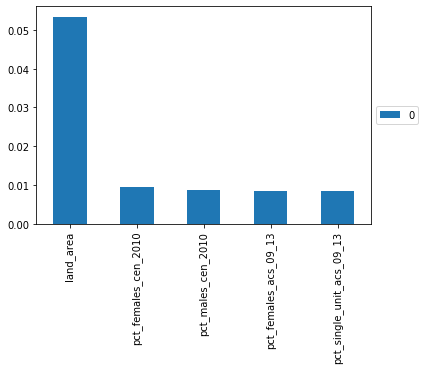

In [26]:
# get top K features and plot them
K = 5
top_features = dict(sorted(brf_feature_importance.items(), key = itemgetter(1), reverse = True)[:K])
top_features_df = pd.DataFrame.from_dict(top_features, orient = 'index')

import matplotlib.pyplot as plt
top_features_df.plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Evaluate Models

### Confusion Matrices

In [ ]:
print('Confusion Matrices')
print('-----------------------------------------------------')
print('Decision Tree')
print(clf_report)
print('-----------------------------------------------------')
print('Random Forest')
print(rf_report)
print('-----------------------------------------------------')
print('Decision Tree with Class Balancing')
print(bclf_report)
print('-----------------------------------------------------')
print('Random Forest with Class Balancing')
print(brf_report)
print('-----------------------------------------------------')

### ROC-AUC Score

In [ ]:
from sklearn.metrics import roc_auc_score

clf_prob_predictions = clf.predict_proba(X_test)
bclf_prob_predictions = bclf.predict_proba(X_test)
rf_prob_predictions = rf.predict_proba(X_test)
brf_prob_predictions = brf.predict_proba(X_test)

In [ ]:
print(f"Decision Tree ROC-AUC score: {roc_auc_score(y_test, clf_prob_predictions[:,1])}")
print(f"Balanced Decision Tree ROC-AUC score: {roc_auc_score(y_test, bclf_prob_predictions[:,1])}")
print(f"Random Forest ROC-AUC score: {roc_auc_score(y_test, rf_prob_predictions[:,1])}")
print(f"Balanced Random Forest ROC-AUC score: {roc_auc_score(y_test, brf_prob_predictions[:,1])}")

## Reduce Features and Iterate

In [27]:
# Select the bottom K features for exclusion
K = 187
bottom_features = dict(sorted(brf_feature_importance.items(), key = itemgetter(1))[:K])
# make a list of the feature names
bottom_list = list(bottom_features.keys())

In [28]:
# make a new exclusion list and generate a new features df
new_exclusion_list = exclusion_list + bottom_list

new_feature_df = data_df.copy()
new_feature_df.drop(new_feature_df[new_exclusion_list],axis=1,inplace=True)
feature_names = new_feature_df.columns

new_feature_df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220423 entries, 0 to 220422
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   land_area                     220423 non-null  float64
 1   rural_pop_cen_2010            220423 non-null  float64
 2   med_house_value_bg_acs_09_13  220423 non-null  float64
 3   med_house_value_tr_acs_09_13  220423 non-null  float64
 4   mail_return_rate_cen_2010     220423 non-null  float64
 5   low_response_score            220423 non-null  float64
 6   pct_rural_pop_cen_2010        220423 non-null  float64
 7   pct_males_cen_2010            220423 non-null  float64
 8   pct_males_acs_09_13           220423 non-null  float64
 9   pct_females_cen_2010          220423 non-null  float64
 10  pct_females_acs_09_13         220423 non-null  float64
 11  pct_pop_under_5_cen_2010      220423 non-null  float64
 12  pct_pop_5_17_acs_09_13        220423 non-nul

In [31]:
%%time
from sklearn.metrics import roc_auc_score
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(new_feature_df, target, random_state=42)

brf_2 = RandomForestClassifier(n_estimators=200, class_weight='balanced')
brf_2 = brf_2.fit(X_train_2, y_train_2)

brf_2_predictions = brf_2.predict(X_test_2)
brf_2_prob_predictions = brf_2.predict_proba(X_test_2)


print(classification_report(y_test_2, brf_2_predictions))

print(f"ROC-AUC score: {roc_auc_score(y_test_2, brf_2_prob_predictions[:,1])}")

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     54790
         1.0       1.00      0.08      0.15       316

    accuracy                           0.99     55106
   macro avg       1.00      0.54      0.57     55106
weighted avg       0.99      0.99      0.99     55106

ROC-AUC score: 0.66557457010773
Wall time: 2min 15s


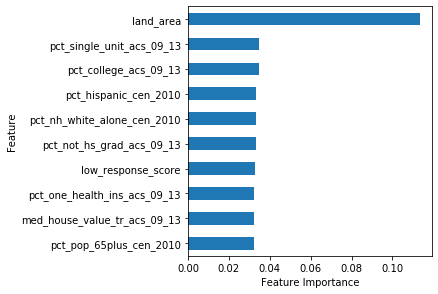

In [45]:
brf_2_feature_importance = {feature_names[i]: brf_2.feature_importances_[i] for i in range(len(feature_names))}
# get top K features and plot them
K = 10
top_features = dict(sorted(brf_2_feature_importance.items(), key = itemgetter(1), reverse = True)[:K])
top_features_df = pd.DataFrame.from_dict(top_features, orient = 'index')

import matplotlib.pyplot as plt
plot = top_features_df.plot(kind='barh', legend = None)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.ylabel('Feature')
plt.xlabel('Feature Importance')
fig = plot.get_figure()
fig.savefig("top_10_forest_features.png", bbox_inches='tight')

In [ ]:
# %%time
# best_features = 0
# best_roc_auc_score = 0
# score_log = {}

# for i in range(0, len(feature_df.columns)-1):
    
#     print('-----------------------------------------------------')
#     print(f"Top {len(feature_df.columns)-i} features")
    
#     # trim off a bunch of features
#     K = i
#     bottom_features = dict(sorted(brf_feature_importance.items(), key = itemgetter(1))[:K])
    
#     # make a list of the feature names
#     bottom_list = list(bottom_features.keys())
#     new_exclusion_list = exclusion_list + bottom_list

#     # create the new feature list
#     new_feature_df = data_df.copy()
#     new_feature_df.drop(new_feature_df[new_exclusion_list],axis=1,inplace=True)
#     feature_names = new_feature_df.columns

#     # create the train/test split
#     X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(new_feature_df, target, random_state=42)

#     # create and fit the model
#     brf_2 = RandomForestClassifier(n_estimators=200, class_weight='balanced')
#     brf_2 = brf_2.fit(X_train_2, y_train_2)

#     # run some predictions
#     brf_2_predictions = brf_2.predict(X_test_2)
#     brf_2_prob_predictions = brf_2.predict_proba(X_test_2)
    
#     new_score = roc_auc_score(y_test_2, brf_2_prob_predictions[:,1])
    
#     score_log[len(feature_df.columns)-i] = new_score
    
#     if new_score > best_roc_auc_score:
#         best_roc_auc_score = new_score
#         best_features = len(feature_df.columns)-i
        
#     # print results
#     print(classification_report(y_test_2, brf_2_predictions))
#     print(f"ROC-AUC score: {new_score}")
#     print('-----------------------------------------------------')

In [ ]:
# print(f"Best results was a ROC-AUC score of {best_roc_auc_score} for the top {best_features} features.")

In [ ]:
# print(score_log)

# Finish chosen model

In [ ]:
# select the chosen model
model = brf_2

## Save Model

In [ ]:
import joblib
filename = 'superfund_site_model.sav'
joblib.dump(model, filename)

## Generate Predictions

In [ ]:
# get features for generating predictions for full dataset
new_feature_df.info()

In [ ]:
# generate predictions using the final selected model
site_presence_prediction = model.predict_proba(new_feature_df)

In [ ]:
# make a list of the predictions
predicted_probabilities = []
for i in range(0, len(site_presence_prediction)):
    predicted_probabilities.append(site_presence_prediction[i][1])

In [ ]:
# add predictions to the full dataset for export
export_df = data_df.copy()
export_df['site_probability'] = predicted_probabilities
export_df['score_prediction'] = 0.0

In [ ]:
export_df.info()

## Export to csv

In [ ]:
export_df.to_csv(export_data_csv, index = False)

## Export feature list

In [ ]:
tree_features = new_feature_df.columns.values.tolist()
tree_features

In [ ]:
site_model_features = new_feature_df.columns.values.tolist()
f = open("feature_list_vault.py", "a")
hasTextBeenWritten = False
f.write("site_model_features = [ \n")
for i in site_model_features: 
    if hasTextBeenWritten:
        f.write(",\n")
    f.write(f"'{i}'")
    hasTextBeenWritten = True
f.write("\n]\n\n")
f.close()